# Project 4 - Hackathon Project<br>

Brandie Hatch

- Problem Statement
- Overview
- Import Data
- Data Cleaning
- EDA

## Problem Statement<br>
__Problem:__ As the customer's individual bank balance decreases, how does the credit default status of a customer change? 

__Goal:__ predict credit default based on bank balance and other features. 

## Overview <br>

The dataset that I chose is from the Bank Marketing Dataset on Kaggle. The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required.

Source: https://www.kaggle.com/datasets/hariharanpavan/bank-marketing-dataset-analysis-classification?select=bank-full.csv

| Feature   | Type | Description                                                                                |
|-----------|------|--------------------------------------------------------------------------------------------|
| age       |      | Age of customer                                                                            |
| job       |      | Customer's job                                                                             |
| marital   |      | Marital status of customer                                                                 |
| education |      | Customer education level                                                                   |
| default   |      | Customer has credit in default?                                                            |
| balance   |      | Customer's individual bank balance                                                         |
| housing   |      | Customer has housing loan?                                                                 |
| personal  |      | Customer has personal loan?                                                                |
| contact   |      | Communication type                                                                         |
| day       |      | Last contact day of the week                                                               |
| month     |      | Last contact month of the year                                                             |
| duration  |      | Last contact duration, in seconds                                                          |
| campaign  |      | Number of contacts performed before campaign for this client                               |
| pdays     |      | Number of days that passed by after the client was last contacted from a previous campaign |
| previous  |      | Number of contacts performed before this campaign and for this client                      |
| poutcome  |      | Outcome of the previous marketing campaign                                                 |
| termdep   |      | Has the client subscribed to term deposit                                                  |

## Import Data

In [40]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.options.display.max_columns =999

In [41]:
# read in the data
df = pd.read_csv("../data/bank-full.csv")


## Data Cleaning

In [42]:
# review the data frame to see column headers and shape
print(df.shape)
df.head()

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [43]:
# check info to look at dtype and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [44]:
# change column name from "loan" to "personal" along with "y" to "termdep" for easier readability and matching to data dictionary
df = df.rename(columns={'loan': 'personal', 'y': 'termdep'})

In [45]:
# create column masks so that y/n is changed to 1 and 0
df['default'] = df['default'].map(dict(yes=1, no=0))
df['housing'] = df['housing'].map(dict(yes=1, no=0))
df['personal'] = df['personal'].map(dict(yes=1, no=0))
df['termdep'] = df['termdep'].map(dict(yes=1, no=0))	

In [46]:
# drop any columns that do not directly effect financial data
df = df.drop(['contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome'], axis=1)

In [47]:
print(df.shape)
df.head()

(45211, 9)


,age,job,marital,education,default,balance,housing,personal,termdep
0,58,management,married,tertiary,0,2143,1,0,0
1,44,technician,single,secondary,0,29,1,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,0
3,47,blue-collar,married,unknown,0,1506,1,0,0
4,33,unknown,single,unknown,0,1,0,0,0


In [49]:
# save .csv of cleaned data
df.to_csv('../data/bank_clean.csv', index=False)

## EDA

In [54]:
df.describe()


,age,default,balance,housing,personal,termdep
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,0.116985
std,10.618762,0.133049,3044.765829,0.496878,0.366820,0.321406
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,1.000000


__EDA Conclusion 1)__ 
- Mean customer age is 41 years old
- Approximately 55% of customers have housing loans
- Only about 16% of customers have personal loans
- Max bank balance is $102,127 | Min bank balance is -$8019 | Mean is $1362
- Approximately 11.69% of customers have subscribed to term deposit
- Approximately 2% of customers have credit in default

*There are nine features I want to use with 45211 observations to be used in the modeling.*

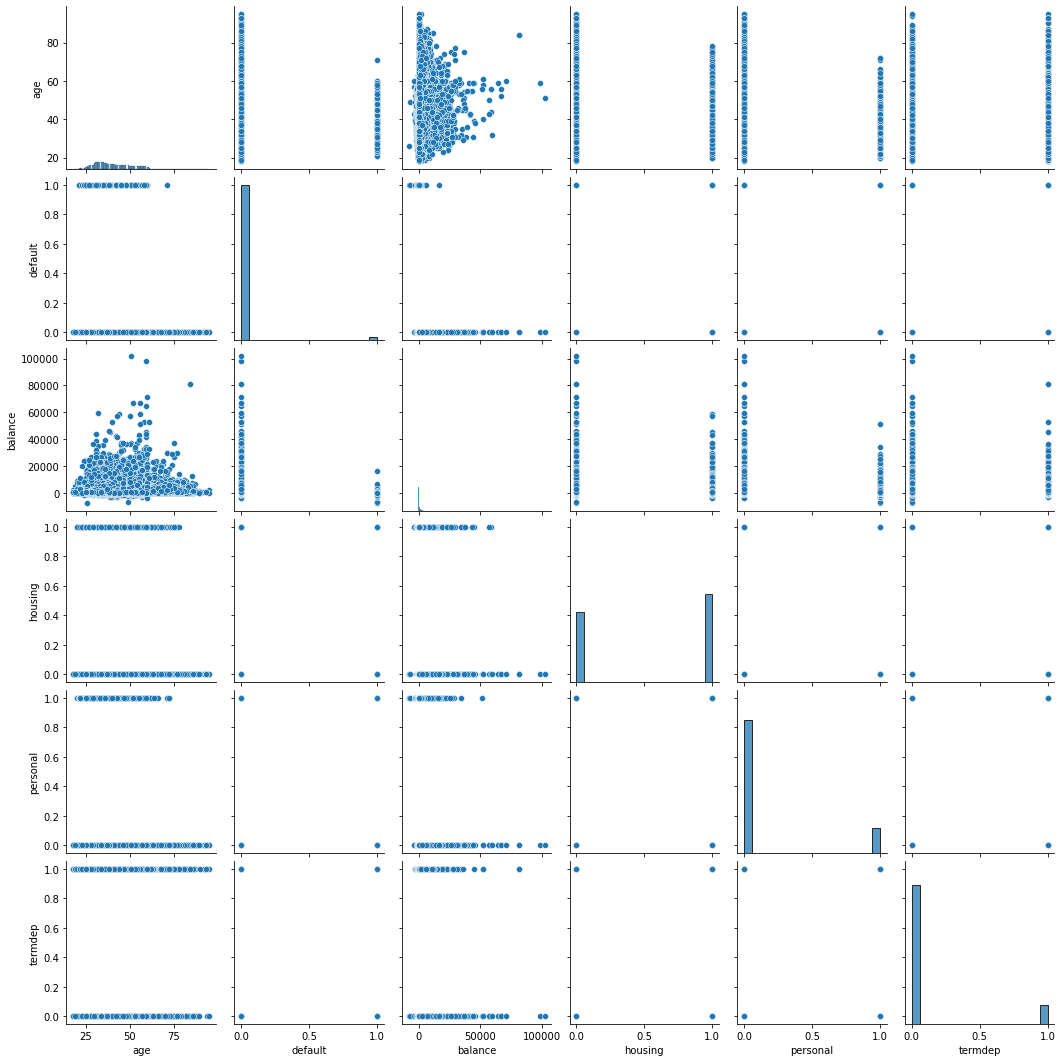

In [50]:
sns.pairplot(df)

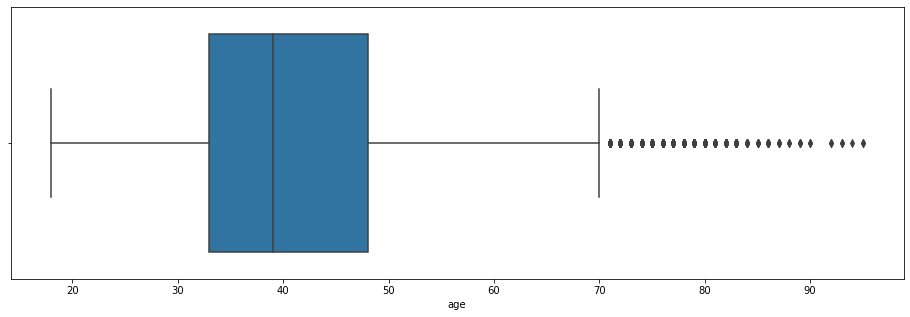

In [35]:
# Use a boxplot to check on outliers for age
plt.figure(figsize=(16, 5))
sns.boxplot(x=df['age']);

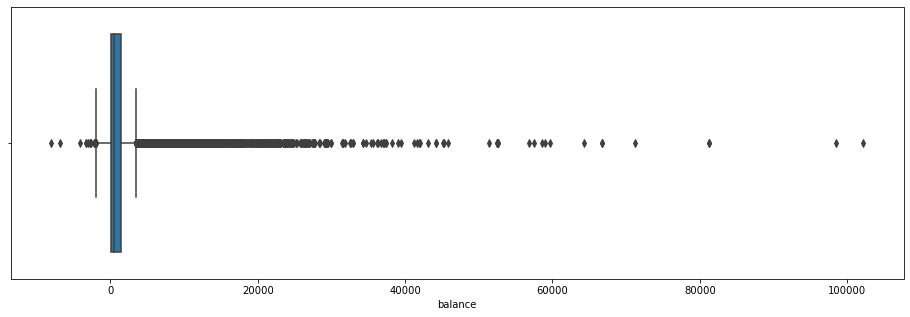

In [51]:
# Use a boxplot to check on outliers for balance
plt.figure(figsize=(16, 5))
sns.boxplot(x=df['balance']);

__EDA Conclusion 2)__ 
- Age boxplot shows that the most concentration for age is about 32 to 48 (mean age is 41) with outliers and the least number of customers aged 70+.
- Balance boxplot does not really demonstrate that there are specific outliers or a common range to note. 

In [52]:
df.corr()

,age,default,balance,housing,personal,termdep
age,1.000000,-0.017879,0.097783,-0.185513,-0.015655,0.025155
default,-0.017879,1.000000,-0.066745,-0.006025,0.077234,-0.022419
balance,0.097783,-0.066745,1.000000,-0.068768,-0.084350,0.052838
housing,-0.185513,-0.006025,-0.068768,1.000000,0.041323,-0.139173
personal,-0.015655,0.077234,-0.084350,0.041323,1.000000,-0.068185
termdep,0.025155,-0.022419,0.052838,-0.139173,-0.068185,1.000000


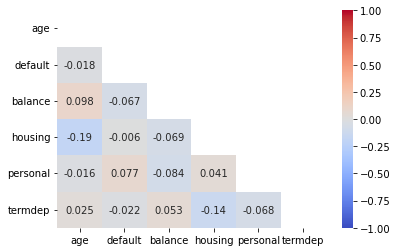

In [53]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='coolwarm', mask=mask, annot=True);

__EDA Conclusion 3)__ 
- Overall, there were no strong linear relationships between any two variables
- Items of note would be the super low negative correlation relationship between credit default and having a housing loan --> could be interpreted: *as credit default increases, the number of housing loans decreases*
- Additionally, the age and housing have a weak negative correlation relationship between the two (but higher relationship compared to other features) 

__*This shows me that I do not want to use linear regression since there is not a strong linear relationship.*__